In [1]:
#!pip install scikit-learn

In [2]:
#!pip install geopandas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed, IntSlider
from sklearn.metrics import pairwise_distances_argmin
import geopandas as gpd
# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [4]:
demograph_data = gpd.read_file('../Clean Data/demographic_data_clean_for_clustering.csv') 
#data = pd.read_csv('demographic_data_clean_for_clustering')
demograph_data.head(1000)

,index,Category,Subcategory,Grouping,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
0,0,Population,Total - Age,Total - Age,2761285,115120,117200,139920,104715,115675,...,94335,112590,117130,108500,110095,111560,103690,94025,102755,101485
1,1,Population,Total - Age,0 to 4 years,123385,5755,5105,6765,4770,6045,...,4600,4375,4525,6035,5610,5165,4000,3770,5195,4365
2,2,Population,Total - Age,5 to 9 years,128805,6160,5825,6180,5015,6060,...,4755,4780,4480,6455,6230,5880,4480,4660,5890,5080
3,3,Population,Total - Age,10 to 14 years,131150,6585,6370,5515,5230,6360,...,5225,5010,4425,6195,6285,5920,4815,4665,6090,5590
4,4,Population,Total - Age,15 to 19 years,133820,7085,6540,5160,4680,6390,...,5225,5090,5035,5480,6425,6440,4930,4750,6030,6105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Ethnocultural,Total - Ethnic or cultural origin for the popu...,"Cree, n.o.s.",1380,15,40,90,105,50,...,10,15,15,150,75,50,40,10,50,15
996,996,Ethnocultural,Total - Ethnic or cultural origin for the popu...,Korean,42200,500,1890,2365,835,375,...,1380,4195,11050,815,505,525,790,225,285,300
997,997,Ethnocultural,Total - Ethnic or cultural origin for the popu...,Romanian,20010,280,1125,1080,835,210,...,1480,1735,1015,870,490,385,285,155,355,315
998,998,Ethnocultural,Total - Ethnic or cultural origin for the popu...,Lebanese,11530,155,485,625,490,215,...,785,480,400,370,250,1135,465,115,195,300


In [5]:
#Reset the index and turn the old index into a column before transposing
demograph_data = demograph_data.reset_index()

#Drop disruptive columns
demograph_data = demograph_data.drop(columns=['index', 'Category', 'Subcategory'])

#Set the correct 'Grouping' column as the index
demograph_data = demograph_data.set_index('Grouping')

#Now transpose the DataFrame, which will make the rows into columns
demograph_data = demograph_data.T

#Drop the row for 'Toronto' after transposing 
tdemograph_data = demograph_data.drop(index=['Toronto'])

#Display the new DataFrame
tdemograph_data

Grouping,Total - Age,0 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,...,Net self-employment income %,Investment income %,Private retirement income %,Market income not included elsewhere %,Government transfers %,Canada Pension Plan (CPP) and QuÃšbec Pension Plan (QPP) benefits %,Old Age Security pension (OAS) and Guaranteed Income Supplement (GIS) %,Employment Insurance (EI) benefits %,Child benefits $,Other government transfers %
level_0,0,1,2,3,4,5,6,7,8,9,...,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481
Ward 1,115120,5755,6160,6585,7085,9645,10095,8125,7265,6905,...,1.2,2.2,4.5,2.2,34.8,5.2,3.8,2.1,6.9,16.8
Ward 2,117200,5105,5825,6370,6540,6600,6820,6755,7395,7045,...,4.3,8.7,8.7,2.7,18.8,3.7,4.2,1.1,2.2,7.5
Ward 3,139920,6765,6180,5515,5160,7040,11455,13980,12460,10305,...,3.6,6.9,6.5,2.6,15.8,2.8,3,1.3,1.6,7.1
Ward 4,104715,4770,5015,5230,4680,4550,7690,10640,9900,8465,...,6.2,5.3,5.3,2.5,14.6,2.5,2.3,1.2,1.4,7.2
Ward 5,115675,6045,6060,6360,6390,7490,8205,8450,8400,7845,...,2,2.4,4.5,2.4,32.6,5.1,4,2.2,5.4,15.9
Ward 6,107355,5265,5205,5085,5705,7225,7840,7570,7560,7710,...,3.4,6.8,4.2,2.9,25.8,4.5,3.4,1.8,3.7,12.4
Ward 7,111200,5785,6205,6780,7175,9380,8750,7460,7445,7180,...,1.3,1.4,2.5,2.5,39.7,5.8,3.6,2.5,7.8,20
Ward 8,114820,5835,6205,7075,7220,7145,6975,7575,7580,7910,...,6.9,12.1,6.1,3.6,15,2.7,2.8,1,1.8,6.7
Ward 9,104730,4665,4430,4005,3895,5595,9930,12345,10760,8415,...,5.6,3.4,2.7,2.2,19.4,3.4,2.5,1.6,2.1,9.7


In [6]:
pd.set_option('display.max_columns', None)

demograph_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, level_0 to Ward 25
Columns: 1482 entries, Total - Age to     Other government transfers %
dtypes: object(1482)
memory usage: 313.9+ KB


In [7]:
type(demograph_data)

pandas.core.frame.DataFrame

In [8]:
column_names = demograph_data.columns.tolist()
print(column_names)
#remember to remove the spaces in the column names

['Total - Age', '  0 to 4 years', '  5 to 9 years', '  10 to 14 years', '  15 to 19 years', '  20 to 24 years', '  25 to 29 years', '  30 to 34 years', '  35 to 39 years', '  40 to 44 years', '  45 to 49 years', '  50 to 54 years', '  55 to 59 years', '  60 to 64 years', '  65 to 69 years', '  70 to 74 years', '  75 to 79 years', '  80 to 84 years', '  85 to 89 years', '  90 years and over', 'Median age', 'Total - Occupied private dwellings by structural type of dwelling - 25% sample data', '  Single-detached house', '  Semi-detached house', '  Row house', '  Apartment or flat in a duplex', '  Apartment in a building that has fewer than five storeys', '  Apartment in a building that has five or more storeys', '  Other single-attached house', '  Movable dwelling', 'Total - Tenure (includes band housing)', '  Owned', '    Part of a condominium', '    Not part of a condominium', '  Rented', '    Part of a condominium', '    Not part of a condominium', 'Total - Occupied private dwellings b

ValueError: Could not interpret value `ax` for parameter `hue`

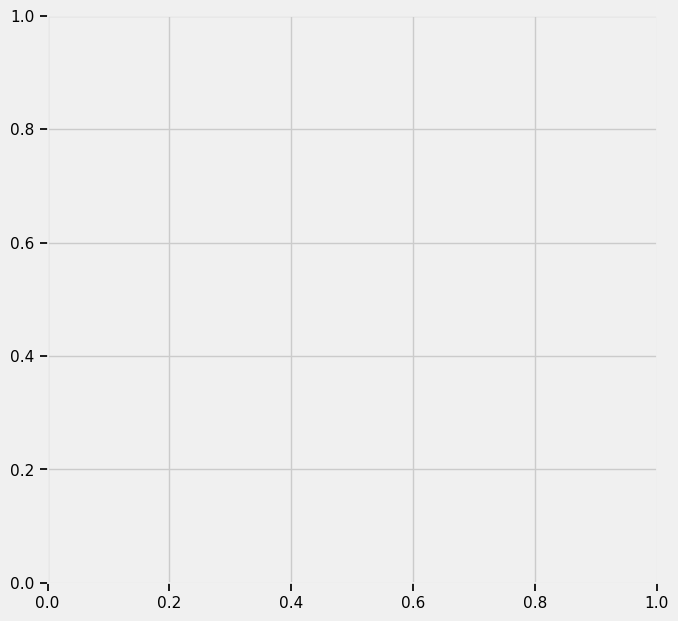

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))

fig.subplots_adjust(wspace = 0.15)

sns.scatterplot(data = tdemograph_data, x = '  0 to 4 years', y = 'Gender:   Women +', hue = 'ax') #Should there be multiple graphs? Or is this where the dendrogram comes in?

ax.set_xlabel('Age', fontsize = 16)

ax.set_ylabel('Income', fontsize = 16)

ax.set_xlim([-17, 17])

ax.set_ylim([-17, 17]);

In [10]:
tdemograph_data.dtypes

Grouping
Total - Age                                                                    object
  0 to 4 years                                                                 object
  5 to 9 years                                                                 object
  10 to 14 years                                                               object
  15 to 19 years                                                               object
                                                                                ...  
    Canada Pension Plan (CPP) and QuÃšbec Pension Plan (QPP) benefits %        object
    Old Age Security pension (OAS) and Guaranteed Income Supplement (GIS) %    object
    Employment Insurance (EI) benefits %                                       object
    Child benefits $                                                           object
    Other government transfers %                                               object
Length: 1482, dtype: object

In [11]:
#ward_columns = [col for col in tdemograph_data.columns if 'Ward' in col]
tdemograph_data = tdemograph_data.apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(tdemograph_data.dtypes)

Grouping
Total - Age                                                                      int64
  0 to 4 years                                                                   int64
  5 to 9 years                                                                   int64
  10 to 14 years                                                                 int64
  15 to 19 years                                                                 int64
                                                                                ...   
    Canada Pension Plan (CPP) and QuÃšbec Pension Plan (QPP) benefits %        float64
    Old Age Security pension (OAS) and Guaranteed Income Supplement (GIS) %    float64
    Employment Insurance (EI) benefits %                                       float64
    Child benefits $                                                           float64
    Other government transfers %                                               float64
Length: 1482, dtype: object


In [12]:
tdemograph_data.to_csv('C:/Users/amirv/OneDrive/Desktop/bigproject/transposed_data.csv', index=False)

In [17]:
#tdemograph_data = tdemograph_data.fillna(0)

In [18]:
# #Standardize the data (important for clustering)
# scaler = StandardScaler()
# demograph_scaled = scaler.fit_transform(tdemograph_data)

# #Determine the optimal number of clusters using the Elbow method
# inertia = []
# k_range = range(1, 11)  # Test for 1 to 10 clusters
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(demograph_scaled)
#     inertia.append(kmeans.inertia)

# #Plot the Elbow Curve
# plt.figure(figsize=(10, 6))

# plt.plot(krange, inertia, marker = 'o', linestyle = '--')
# plt.title("Elbow Method for Optimal K")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.show()

# #Choose an optimal number of clusters based on the Elbow Curve (e.g., 2 or 3)
# optimal_k = 3  # Adjust based on the elbow curve
# kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
# demograph_data['Cluster'] = kmeans.fit_predict(df_scaled)

# #Add cluster labels to the original data
# print(demograph_data)

# #Visualize clusters
# sns.pairplot(pd.DataFrame(demograph_scaled, columns = tdemograph_data.columns[:-1]), hue = kmeans.labels)
# plt.title("Ward Clustering")
# plt.show()

In [19]:
print("Original data shape:", demograph_data.shape)
print("Processed data shape:", tdemograph_data.shape)

Original data shape: (27, 1482)
Processed data shape: (26, 1482)


In [ ]:
# Standardize the data (important for clustering)
scaler = StandardScaler()
demograph_scaled = scaler.fit_transform(tdemograph_data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)  # Test for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(demograph_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Choose an optimal number of clusters based on the Elbow Curve (e.g., 2 or 3)
optimal_k = 5  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
tdemograph_data['Cluster'] = kmeans.fit_predict(demograph_scaled)

# Add cluster labels to the original data
print(demograph_data)

# Visualize clusters
sns.pairplot(pd.DataFrame(demograph_scaled, columns=tdemograph_data.columns[:-1]), hue=kmeans.labels_)
plt.title("Ward Clustering")
plt.show()